In [46]:
import datetime
import pandas as pd
import seaborn as sns
import numpy.random as npr
import matplotlib
from matplotlib import pyplot, rcParams
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN
from sdv.evaluation import evaluate

DATASET_PATH = "data.csv"
USER_COLUMNS = ["gender", "occupation", "age"]
MOVIE_COLUMNS = [*[f"tag{n}" for n in range(18)]]
SEED = 2021
npr.seed(SEED)

In [11]:
%%time
df = pd.read_csv(DATASET_PATH)
df = df[USER_COLUMNS + MOVIE_COLUMNS].drop_duplicates()
df

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,movie_id,rating,timestamp,movie_name,tag0,tag1,tag2,tag3,tag4,...,tag12,tag13,tag14,tag15,tag16,tag17,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,M,45,5,77662


In [14]:
def fit_evaluate(df, models, sample_size):
    result = pd.DataFrame()
    for model_name, model in models.items():
        model.fit(df)
        eval_result = evaluate(df, model.sample(sample_size), aggregate=False)
        eval_result["model_name"] = model_name
        result = pd.concat([result, eval_result])
    return result
        
    

In [15]:
%%time
npr.seed(SEED)
eval_result = fit_evaluate(
    dataset, 
    models={
        "CTGAN": CTGAN(epochs=10, verbose=True),
        "CopulaGAN": CopulaGAN(epochs=10, verbose=True),
        "GaussianCopula": GaussianCopula(),
    },
    sample_size=1000
)

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Convergence

Epoch 1, Loss G: -0.5060,Loss D:  0.0176
Epoch 2, Loss G: -1.4451,Loss D:  0.2519
Epoch 3, Loss G: -2.1237,Loss D:  0.1121
Epoch 4, Loss G: -1.8674,Loss D:  0.0135
Epoch 5, Loss G: -1.7961,Loss D: -0.0687
Epoch 6, Loss G: -1.7207,Loss D: -0.3290
Epoch 7, Loss G: -2.4477,Loss D:  0.1109
Epoch 8, Loss G: -1.7806,Loss D: -0.0520
Epoch 9, Loss G: -1.5224,Loss D:  0.2117
Epoch 10, Loss G: -1.9825,Loss D: -0.0934


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value 

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Convergence

Epoch 1, Loss G:  0.1933,Loss D:  0.0743
Epoch 2, Loss G: -0.7018,Loss D:  0.0021
Epoch 3, Loss G: -0.3344,Loss D: -0.0657
Epoch 4, Loss G: -0.6801,Loss D: -0.0503
Epoch 5, Loss G: -1.6468,Loss D:  0.0701
Epoch 6, Loss G: -1.7326,Loss D: -0.0511
Epoch 7, Loss G: -1.5307,Loss D: -0.2304
Epoch 8, Loss G: -1.7364,Loss D: -0.2177
Epoch 9, Loss G: -1.7756,Loss D: -0.0506
Epoch 10, Loss G: -2.1025,Loss D:  0.0392


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value 

In [17]:
eval_result

,metric,name,score,min_value,max_value,goal,model_name
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-0.677017,-inf,0.0,MAXIMIZE,CTGAN
1,LogisticDetection,LogisticRegression Detection,0.519865,0.0,1.0,MAXIMIZE,CTGAN
2,SVCDetection,SVC Detection,0.400460,0.0,1.0,MAXIMIZE,CTGAN
11,GMLogLikelihood,GaussianMixture Log Likelihood,-8.657247,-inf,inf,MAXIMIZE,CTGAN
12,CSTest,Chi-Squared,0.978025,0.0,1.0,MAXIMIZE,CTGAN
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.414116,0.0,1.0,MAXIMIZE,CTGAN
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.441367,0.0,1.0,MAXIMIZE,CTGAN
15,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.934845,0.0,1.0,MAXIMIZE,CTGAN
0,BNLogLikelihood,BayesianNetwork Log Likelihood,-0.676648,-inf,0.0,MAXIMIZE,CopulaGAN
1,LogisticDetection,LogisticRegression Detection,0.047876,0.0,1.0,MAXIMIZE,CopulaGAN


In [20]:
rs = eval_result[
    (eval_result.metric != "GMLogLikelihood") &
    (eval_result.metric != "KSTestExtended") &
    (eval_result.metric != "ContinuousKLDivergence") &
    (eval_result.metric != "BNLogLikelihood")
]

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

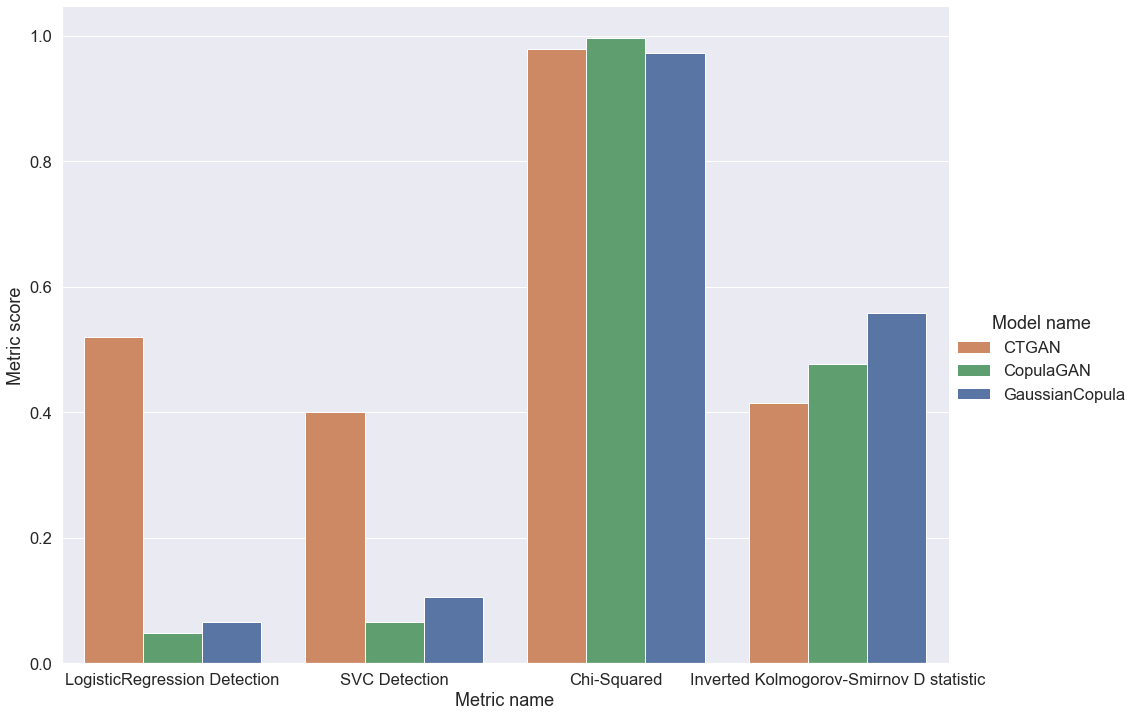

In [58]:
rs["Model name"] = rs["model_name"]
rs["Metric score"] = rs["score"]
rs["Metric name"] = rs["name"]
rcParams['figure.figsize'] = 20, 30
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.set(font_scale=1.5)  # crazy big
sns.catplot(data=rs, x="Metric name", y="Metric score", hue="Model name", kind="bar", aspect=20/15, height=10, palette=[
    "C1", "C2", "C0"
])

In [38]:
list(sns.color_palette())

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]